# Twitch Top 1000 Streamers Exploratory Data Analysis



We want to explore this database with basic information regarding top 1000 Twitch streamers, and find which variables have the most impact on "Views gained", an important metric Twitch streamers want to optimize for.

In [1]:
# Imports

import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns

## Reading and Understanding the Data

In [2]:
df = pd.read_csv("twitchdata-update.csv")
df.index = df.index + 1 # To match the indexing with the rank
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
1,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
2,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
3,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
4,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
5,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
996,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
997,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
998,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
999,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


Now we want to understand the nature of each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Now we want some basic summary statistics to understand the data better.

In [4]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


We also want to look at correlation values for each pair of columns as they might be useful in further analysis.

In [5]:
df.corr()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000


A heat map would be a better way of visualizing this data.

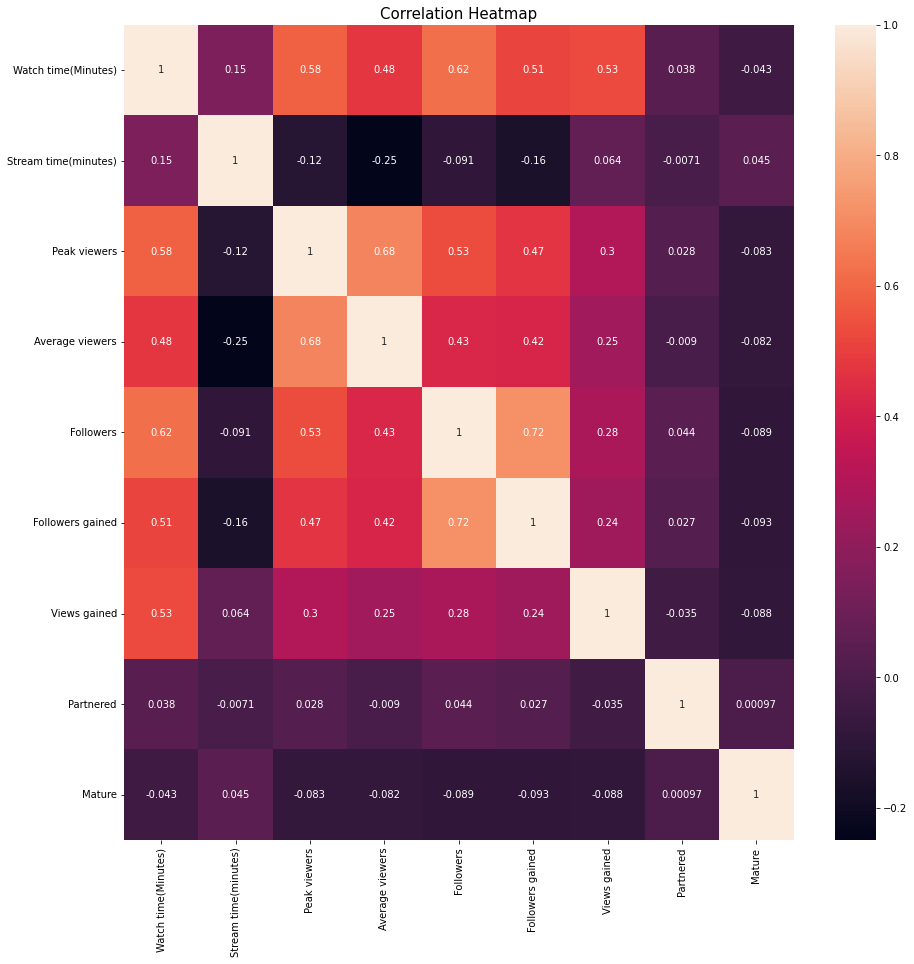

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize= 15)
plt.show()

**Insight:** This tells us that the columns in the dataset don't show very high correlation in any given pair, which means that we'll need a combination of factors to answer our initial question. In particular, the Views gained variable shows decent correlation with Watch time, but not much else.

## Top Views gained channels

We want to look at the top 10 channels by Views gained to get an idea of what that data is visualized as.

Text(0.5, 1.0, 'Top views gained channels')

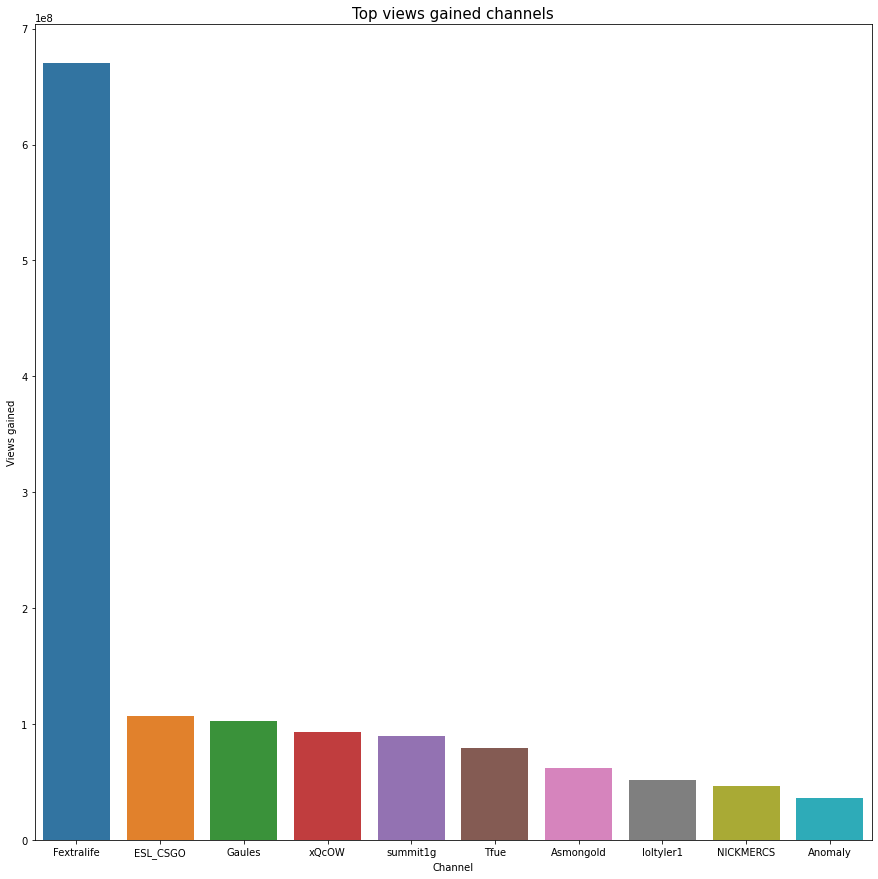

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(x='Channel', y='Views gained', data=df[:10].sort_values(by='Views gained', ascending=False))
plt.title("Top views gained channels", fontsize=15)

**Insight:** We notice that one particular channel "Fextralife" has an anomalous number of Views gained while all other channels show a relatively stable number of Views gained. This outlier somewhat obscures further visualizations but is an important highlight of the dataset.

## Language Analysis

We want to look at the share of different languages among the top 1000 streamers.

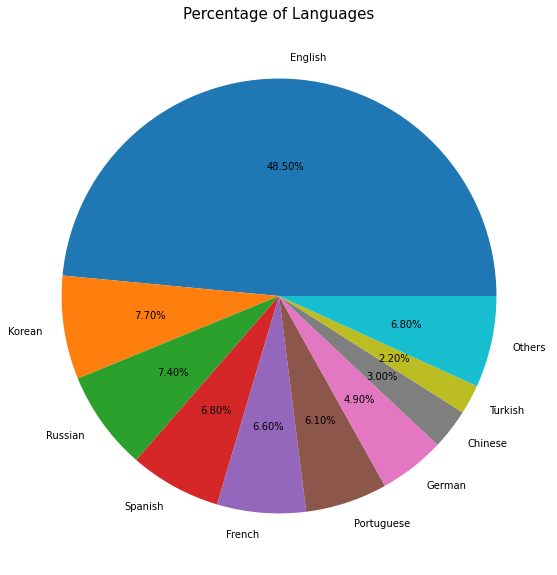

In [23]:
plt.figure(figsize=(15, 10))
language_df = df["Language"].value_counts().to_frame()
language_df = language_df.reset_index()
language_df.columns = ["Language", "Count"]
language_df_top = language_df[:9].copy()
new_row = pd.DataFrame(data= {"Language" : ["Others"], "Count" : [language_df["Count"][9:].sum()]
})
language_df_top = pd.concat([language_df_top, new_row])
plt.pie(language_df_top.Count, labels=language_df_top.Language, autopct="%0.2f%%")
plt.title("Percentage of Languages", fontsize=15)
plt.show()

Now we want to find out how the distribution of Views gained varies with Language.

<AxesSubplot:xlabel='Language', ylabel='Views gained'>

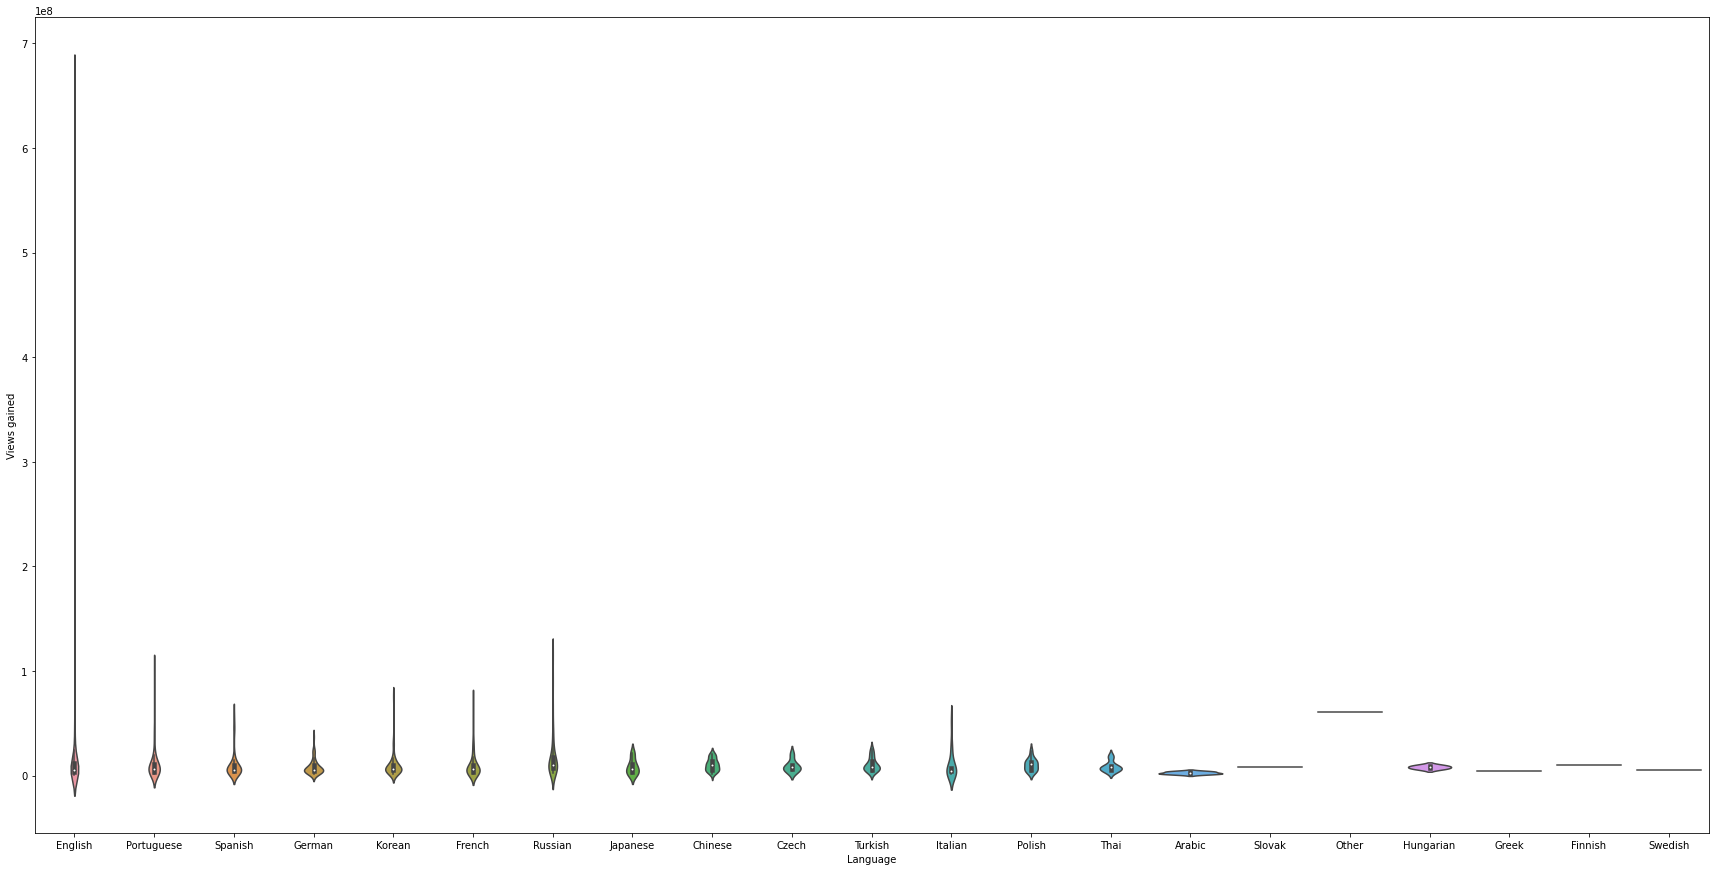

In [27]:
plt.figure(figsize=(30,15))
sns.violinplot(x=df.Language, y=df["Views gained"])

**Insight:** This plot tells us that there are no particularly striking variations in Views gained based on Language. Even though English content is dominant and can cater to more people, it doesn't show any marked advantage over other Languages, apart from one outlier mentioned above.

## Partnered and Mature Content

These are the only two variables that are boolean values. We want to see if there's any link between the two and Views gained.

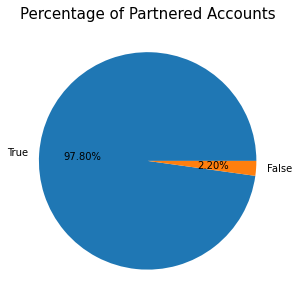

In [7]:
plt.figure(figsize=(5,5))
partnered = df["Partnered"].value_counts()
plt.pie(partnered.values, labels=partnered.index, autopct="%0.2f%%")
plt.title("Percentage of Partnered Accounts", fontsize=15)
plt.show()

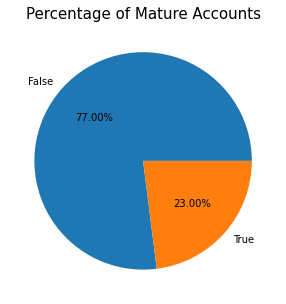

In [8]:
plt.figure(figsize=(5,5))
mature = df["Mature"].value_counts()
plt.pie(mature.values, labels=mature.index, autopct="%0.2f%%")
plt.title("Percentage of Mature Accounts", fontsize=15)
plt.show()

Now we want to see how Views gained varies with Mature content in a stream. Looking at the plot below, it's clear to see that there are more outliers for non-Mature cases, especially one particular one resulting in the abnormal spike. 

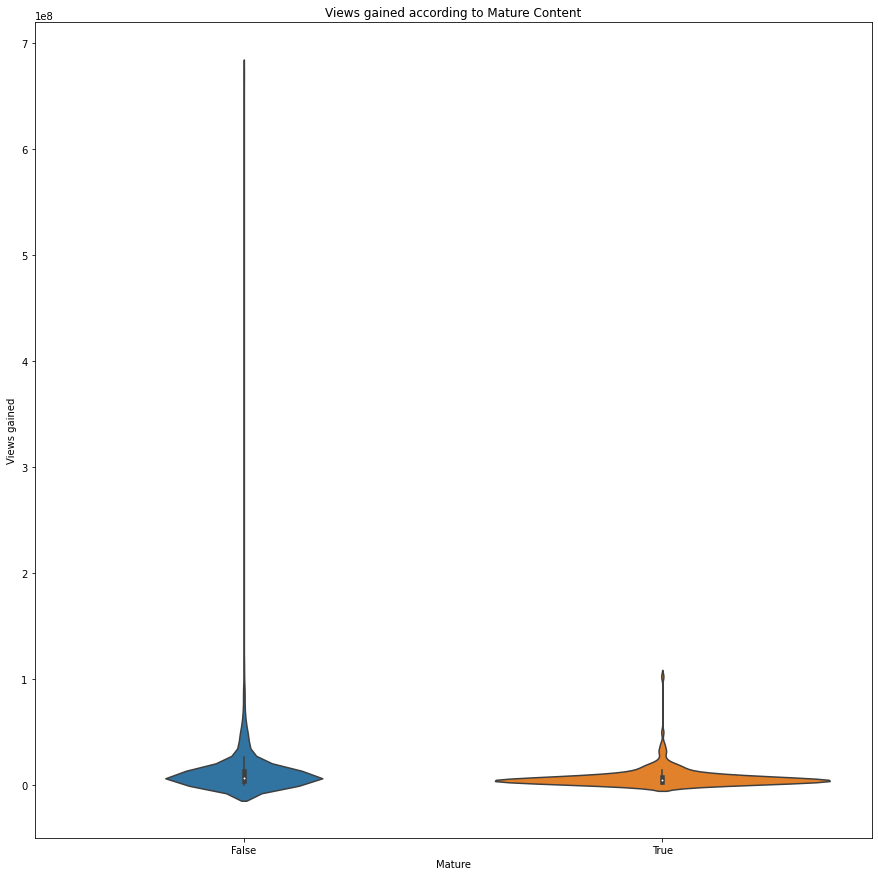

In [12]:
plt.figure(figsize=(15,15))
df = df.explode('Views gained')
sns.violinplot(data=df, x="Mature", y="Views gained")
plt.title("Views gained according to Mature Content")
plt.show()

Now we want to see how Views gained varies with Partnered accounts. In general, we expect Twitch Partnered accounts to do better. Once again, the outlier obscures our plot a little, but comparing the violin plots is still feasible.

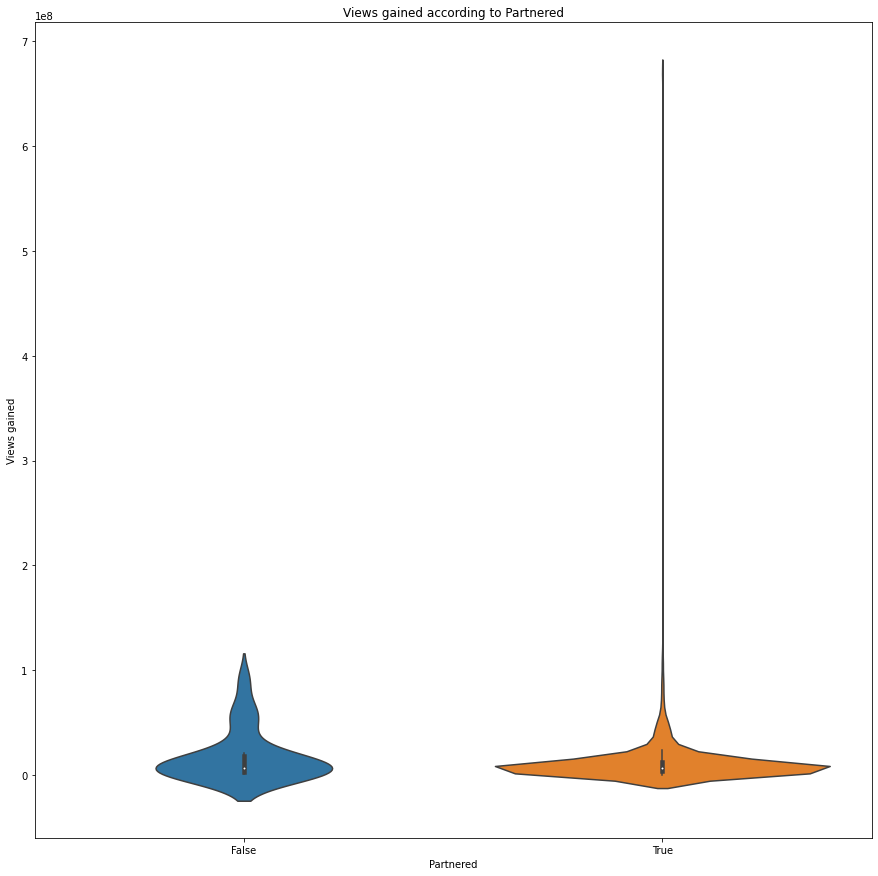

In [13]:
plt.figure(figsize=(15,15))
df = df.explode('Views gained')
sns.violinplot(data=df, x="Partnered", y="Views gained")
plt.title("Views gained according to Partnered")
plt.show()

**Insights:** From the above plots, it's hard to draw any concrete connection between Partnered and Mature content with Views gained. This tells us that these are relatively unimportant characteristics of streams in terms of gaining views. I found this rather surprising as these are usually considered important information regarding a streamer's profile.